# Tracking 'Meals' price from the Marketboard (over 90 days)

This tracker only aims to calculate the most profitable meals and day of the week to buy to do ingame boxing (buying products from players to make box to be sold to NPCs on a daily basis).
To do so, I'll use the BDO API used by the mobile Marketplace App, all infos gathered from VeliaInn site (https://developers.veliainn.com), their discord (https://discord.gg/JFf6r9e) and also Arsha.io API (https://www.postman.com/bdomarket/workspace/arsha-io-bdo-market-api/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime
import time

In [2]:
pd.set_option('display.max_columns', None) #print all columns of a dataframe
pd.set_option('display.max_colwidth', None) #print all data in a feature

In [3]:
#Collecting database of all items from the game
url = 'https://api.arsha.io/util/db/dump?lang=en'
headers = {}
payload = {}

response = requests.request('GET', url)
data = pd.json_normalize(response.json())
data = data.astype({'id':'int'}) #to avoid type conflict in the future

In [4]:
#Retrieve the list of 'Meals'
searched_item = 'Meal'

dft = data.loc[data['name'].str.contains(searched_item.title())] #str.title() -> converts the first character of each word to upper case
dft = dft.astype({'name':'string'})


In [5]:
#Filter the meals to keep only those from the MB 

meals_toremove = ['Box','[Event]','[Oasis]', #List obtained from data wrangling
                  'Cook','Chef','Hearty Meal',
                  'Blessed Meal', 'Royal Meal',
                  'TEST', 'Battlefield',
                  'Professional',
                  'Rich Nutritious Carrot Meal',
                  'Special Imperial Mediah Meal',
                  'Energizing Cron Meal',
                  'Savory Cron Meal'] 

for x in dft['name']:
    for i in meals_toremove:
        if i in x:
            dft = dft.drop(dft[dft['name']==x].index)
            
#Dropping all 10 000 < id  because those aren't in MP either or used in boxing
for x in dft['id']:
    if x > 10000:
        dft = dft.drop(dft[dft['id']==x].index)
dft

,id,name,grade,icon
35239,9360,Special Eilton Specialty Meal,3,cdn.arsha.io/icons/9360.png
35359,9693,Exquisite Cron Meal,4,cdn.arsha.io/icons/9693.png
35360,9692,Simple Cron Meal,4,cdn.arsha.io/icons/9692.png
35361,9691,Seafood Cron Meal,4,cdn.arsha.io/icons/9691.png
35363,9644,Marvelous Special Eilton Specialty Meal,4,cdn.arsha.io/icons/9644.png
35365,9642,Marvelous Eilton Meal,4,cdn.arsha.io/icons/9642.png
35366,9641,Special Eilton Meal,4,cdn.arsha.io/icons/9641.png
35367,9640,Eilton Meal,3,cdn.arsha.io/icons/9640.png
35368,9639,Special O&#39;dyllita Meal,4,cdn.arsha.io/icons/9639.png
35369,9638,O&#39;dyllita Meal,3,cdn.arsha.io/icons/9638.png


In [6]:
#Creating a list of index to retrieve from the MB
s = pd.DataFrame(dft, columns=['id']).squeeze().tolist()
print(s)

[9360, 9693, 9692, 9691, 9644, 9642, 9641, 9640, 9639, 9638, 9637, 9636, 9635, 9634, 9632, 9610, 9609, 9608, 9607, 9606, 9605, 9604, 9603, 9602, 9601]


In [7]:
#Retrieving prices from BDO API
url = 'https://eu-trade.naeu.playblackdesert.com/Trademarket/GetMarketPriceInfo'

resp = pd.DataFrame()
count = 0
for x_item in s:
    response = requests.request('POST', url, json={"keyType":0,"mainKey":x_item, "subKey":0}, headers=headers)
    temp = pd.json_normalize(response.json())
    temp.insert(0,'ID', x_item)

    resp = pd.concat([resp,temp] )

resp

,ID,resultCode,resultMsg
0,9360,0,28900-28900-28900-28848-28848-30579-30795-30795-30800-30800-30600-30567-30567-30567-30567-30500-30500-30394-30400-30200-30040-30040-29745-29745-29639-29568-29568-29639-29639-29700-29700-29600-29600-29399-29399-29399-29317-29317-29317-29000-28809-28809-28809-28895-27600-27526-27907-27907-27907-27907-28858-28858-28858-28858-28858-28900-28900-29074-29074-29585-29667-29667-29667-29667-29667-29667-31200-31200-31200-31179-31179-31200-31200-31590-31590-33500-33500-33499-33499-33331-33331-33499-33499-33498-33500-33500-33499-33500-33500-33500
0,9693,0,394850-394850-395898-391831-392095-382871-376533-373913-368907-365603-367532-366343-355777-364489-367950-381994-387511-397703-397767-396057-396334-396946-397099-392150-388742-375605-352891-320978-327916-342771-346086-342864-344714-344513-344120-343496-340767-339165-335607-336645-329454-334995-333849-334233-330612-334180-334563-334235-344057-342231-342911-371779-385838-386028-384920-381512-382585-367456-373997-367822-369129-370230-338979-329708-350112-347824-346832-350740-336867-348701-349216-352720-350472-342916-350924-349454-349136-346758-323375-286655-263047-242774-273682-253855-272761-272773-283660-283534-281107-300797
0,9692,0,367155-367155-368344-368337-367060-368447-371333-374700-374413-374965-416246-477087-484976-466778-463527-422886-381489-373731-371416-377421-378794-380898-377945-382317-374203-361201-350218-361031-367711-370062-381434-387325-379900-399891-402899-426296-413213-393652-383675-374977-367160-365593-378794-391756-394645-389839-376339-370858-357837-362336-382159-364425-360287-342846-352218-344907-346561-354950-367572-393255-390566-393028-383779-385104-375663-367003-354072-351885-352758-373967-372656-367741-367338-362807-363522-360089-363863-363669-362112-359002-357758-356909-354749-353857-349715-350857-347372-350508-354194-354296
0,9691,0,351401-351401-348019-332404-340858-347128-332100-328440-322312-317754-319986-316493-330628-342972-342446-343747-342808-342827-344481-360248-355317-353683-357086-358488-348248-353169-349646-347224-347969-342411-339737-336646-327593-319201-316730-317851-302803-310080-308976-308449-328825-338872-347554-335177-335796-332922-332669-330299-331623-327611-354458-354154-352900-349346-350940-349253-346371-336862-328683-339534-335902-335736-334167-334408-328362-317325-301200-304963-297134-297938-298492-299801-302743-300736-298625-304533-301774-301796-300635-300987-299947-300611-299896-300204-298376-297990-294406-295894-299531-310683
0,9644,0,3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4668029-4382394-4382394-4382394-4382394-4382394-4382394-4265454-4265454-4265454-4265454-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195
0,9642,0,5907758-5907758-5907758-5907758-5902850-5902850-5703673-5703673-5703673-5334285-5334285-5207931-4850897-4850897-4962247-5060204-5060204-5060204-5029901-4906495-4925223-4904214-4837716-4837716-4913686-4922338-4922338-4900970-4900970-4882120-4882120-4854270-4787475-4682452-4682452-4682452-4556151-4450493-4450493-4587035-4532364-4532364-4392594-4262727-4262727-4397549-4356474-4356474-4281223-4021727-4021727-4299155-4299155-4389920-4389920-4395594-4395594-4386545-4369912-4369912-4463299-4463299-4506403-4719009-4719009-4719009-4971121-4971121-4971121-5281652-5281652-5635567-5908874-5908874-5908874-6015919-6015919-6015919-6380452-6380452-6589419-6189295-6189295-6538625-6538625-6538625-6441875-6441875-6355609-6355609
0,9641,0,88678-88678-88678-92031-92031-92031-92031-

In [8]:
resp = resp.drop(columns=['resultCode'])
resp

,ID,resultMsg
0,9360,28900-28900-28900-28848-28848-30579-30795-30795-30800-30800-30600-30567-30567-30567-30567-30500-30500-30394-30400-30200-30040-30040-29745-29745-29639-29568-29568-29639-29639-29700-29700-29600-29600-29399-29399-29399-29317-29317-29317-29000-28809-28809-28809-28895-27600-27526-27907-27907-27907-27907-28858-28858-28858-28858-28858-28900-28900-29074-29074-29585-29667-29667-29667-29667-29667-29667-31200-31200-31200-31179-31179-31200-31200-31590-31590-33500-33500-33499-33499-33331-33331-33499-33499-33498-33500-33500-33499-33500-33500-33500
0,9693,394850-394850-395898-391831-392095-382871-376533-373913-368907-365603-367532-366343-355777-364489-367950-381994-387511-397703-397767-396057-396334-396946-397099-392150-388742-375605-352891-320978-327916-342771-346086-342864-344714-344513-344120-343496-340767-339165-335607-336645-329454-334995-333849-334233-330612-334180-334563-334235-344057-342231-342911-371779-385838-386028-384920-381512-382585-367456-373997-367822-369129-370230-338979-329708-350112-347824-346832-350740-336867-348701-349216-352720-350472-342916-350924-349454-349136-346758-323375-286655-263047-242774-273682-253855-272761-272773-283660-283534-281107-300797
0,9692,367155-367155-368344-368337-367060-368447-371333-374700-374413-374965-416246-477087-484976-466778-463527-422886-381489-373731-371416-377421-378794-380898-377945-382317-374203-361201-350218-361031-367711-370062-381434-387325-379900-399891-402899-426296-413213-393652-383675-374977-367160-365593-378794-391756-394645-389839-376339-370858-357837-362336-382159-364425-360287-342846-352218-344907-346561-354950-367572-393255-390566-393028-383779-385104-375663-367003-354072-351885-352758-373967-372656-367741-367338-362807-363522-360089-363863-363669-362112-359002-357758-356909-354749-353857-349715-350857-347372-350508-354194-354296
0,9691,351401-351401-348019-332404-340858-347128-332100-328440-322312-317754-319986-316493-330628-342972-342446-343747-342808-342827-344481-360248-355317-353683-357086-358488-348248-353169-349646-347224-347969-342411-339737-336646-327593-319201-316730-317851-302803-310080-308976-308449-328825-338872-347554-335177-335796-332922-332669-330299-331623-327611-354458-354154-352900-349346-350940-349253-346371-336862-328683-339534-335902-335736-334167-334408-328362-317325-301200-304963-297134-297938-298492-299801-302743-300736-298625-304533-301774-301796-300635-300987-299947-300611-299896-300204-298376-297990-294406-295894-299531-310683
0,9644,3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-3778571-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4060000-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4349304-4668029-4382394-4382394-4382394-4382394-4382394-4382394-4265454-4265454-4265454-4265454-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4382857-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195-4538195
0,9642,5907758-5907758-5907758-5907758-5902850-5902850-5703673-5703673-5703673-5334285-5334285-5207931-4850897-4850897-4962247-5060204-5060204-5060204-5029901-4906495-4925223-4904214-4837716-4837716-4913686-4922338-4922338-4900970-4900970-4882120-4882120-4854270-4787475-4682452-4682452-4682452-4556151-4450493-4450493-4587035-4532364-4532364-4392594-4262727-4262727-4397549-4356474-4356474-4281223-4021727-4021727-4299155-4299155-4389920-4389920-4395594-4395594-4386545-4369912-4369912-4463299-4463299-4506403-4719009-4719009-4719009-4971121-4971121-4971121-5281652-5281652-5635567-5908874-5908874-5908874-6015919-6015919-6015919-6380452-6380452-6589419-6189295-6189295-6538625-6538625-6538625-6441875-6441875-6355609-6355609
0,9641,88678-88678-88678-92031-92031-92031-92031-92031-92031-92031-92031-9

In [9]:
resultMsg = pd.DataFrame()
for x in resp['resultMsg']:
    temp = pd.DataFrame([x.split('-')])
    resultMsg = pd.concat([resultMsg, temp])

resultMsg['ID'] = resp['ID']
resultMsg = resultMsg.set_index('ID')
resultMsg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9360,28900,28900,28900,28848,28848,30579,30795,30795,30800,30800,30600,30567,30567,30567,30567,30500,30500,30394,30400,30200,30040,30040,29745,29745,29639,29568,29568,29639,29639,29700,29700,29600,29600,29399,29399,29399,29317,29317,29317,29000,28809,28809,28809,28895,27600,27526,27907,27907,27907,27907,28858,28858,28858,28858,28858,28900,28900,29074,29074,29585,29667,29667,29667,29667,29667,29667,31200,31200,31200,31179,31179,31200,31200,31590,31590,33500,33500,33499,33499,33331,33331,33499,33499,33498,33500,33500,33499,33500,33500,33500
9693,394850,394850,395898,391831,392095,382871,376533,373913,368907,365603,367532,366343,355777,364489,367950,381994,387511,397703,397767,396057,396334,396946,397099,392150,388742,375605,352891,320978,327916,342771,346086,342864,344714,344513,344120,343496,340767,339165,335607,336645,329454,334995,333849,334233,330612,334180,334563,334235,344057,342231,342911,371779,385838,386028,384920,381512,382585,367456,373997,367822,369129,370230,338979,329708,350112,347824,346832,350740,336867,348701,349216,352720,350472,342916,350924,349454,349136,346758,323375,286655,263047,242774,273682,253855,272761,272773,283660,283534,281107,300797
9692,367155,367155,368344,368337,367060,368447,371333,374700,374413,374965,416246,477087,484976,466778,463527,422886,381489,373731,371416,377421,378794,380898,377945,382317,374203,361201,350218,361031,367711,370062,381434,387325,379900,399891,402899,426296,413213,393652,383675,374977,367160,365593,378794,391756,394645,389839,376339,370858,357837,362336,382159,364425,360287,342846,352218,344907,346561,354950,367572,393255,390566,393028,383779,385104,375663,367003,354072,351885,352758,373967,372656,367741,367338,362807,363522,360089,363863,363669,362112,359002,357758,356909,354749,353857,349715,350857,347372,350508,354194,354296
9691,351401,351401,348019,332404,340858,347128,332100,328440,322312,317754,319986,316493,330628,342972,342446,343747,342808,342827,344481,360248,355317,353683,357086,358488,348248,353169,349646,347224,347969,342411,339737,336646,327593,319201,316730,317851,302803,310080,308976,308449,328825,338872,347554,335177,335796,332922,332669,330299,331623,327611,354458,354154,352900,349346,350940,349253,346371,336862,328683,339534,335902,335736,334167,334408,328362,317325,301200,304963,297134,297938,298492,299801,302743,300736,298625,304533,301774,301796,300635,300987,299947,300611,299896,300204,298376,297990,294406,295894,299531,310683
9644,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,3778571,4060000,4060000,4060000,4060000,4060000,4060000,4060000,4060000,4060000,4060000,4060000,4349304,4349304,4349304,4349304,4349304,4349304,4349304,4349304,4349304,4349304,4349304,4668029,4382394,4382394,4382394,4382394,4382394,4382394,4265454,4265454,4265454,4265454,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4382857,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195,4538195
9642,5907758,5907758,5907758,5907758,5902850,5902850,5703673,5703673,5703673,5334285,5334285,5207931,4850897,4850897,4962247,5060204,5060204,5060204,5029901,4906495,4925223,4904214,4837716,4837716,4913686,4922338,4922338,4900970,4900970,4882120,4882120,4854270,4787475,4682452,4682452,4682452,4556151,4450493,4450493,4587035,4532364,4532364,4392594,4262727,4262727,4397549,4356474,4356474,4281223,4021727,4021727,4299155,4299155,4389920,4389920,4395594,4395594,4386545,43

## Splitting meal_name in two lists : normal meals and special meals

In [10]:
meals_name = dft.drop(columns=['grade','icon'])


#Slicing Marvelous and Cron Meals from the initial list
marvelous_meals = meals_name.loc[meals_name['name'].str.contains('Marvelous')]
meals_name = meals_name.loc[~meals_name['name'].str.contains('Marvelous')]

cron_meals = meals_name.loc[meals_name['name'].str.contains('Cron Meal')]
meals_name = meals_name.loc[~meals_name['name'].str.contains('Cron Meal')]

#meals_name in two lists (we could have keep them together too)

special_meals = meals_name.loc[meals_name['name'].str.contains('Special')] 
special_meals = special_meals.astype({'id':'int','name':'string'})

normal_meals = meals_name.loc[~meals_name['name'].str.contains('Special')] 
normal_meals = normal_meals.astype({'id':'int','name':'string'})

meals_name

,id,name
35239,9360,Special Eilton Specialty Meal
35366,9641,Special Eilton Meal
35367,9640,Eilton Meal
35368,9639,Special O&#39;dyllita Meal
35369,9638,O&#39;dyllita Meal
35370,9637,Special Drieghanese Meal
35371,9636,Special Kamasylvia Meal
35372,9635,Kamasylvia Meal
35373,9634,Margoria Seafood Meal
35375,9632,Special Arehaza Meal


### Creating the boxing list

In [11]:
qty = [39, 7, 21, 5, 15, 18, 11, 33, 21, 27, 6, 18, 5, 15, 6, 18, 7, 21, 8, 24] #numbers of meals per box (from game data)
print(len(qty))

20


In [12]:
boxing_list = meals_name
print(len(boxing_list))

20


In [13]:
#Matching meals and their required quantity per box
boxing_list['Qty'] = qty
boxing_list.drop(columns='id', inplace=True)
boxing_list

,name,Qty
35239,Special Eilton Specialty Meal,39
35366,Special Eilton Meal,7
35367,Eilton Meal,21
35368,Special O&#39;dyllita Meal,5
35369,O&#39;dyllita Meal,15
35370,Special Drieghanese Meal,18
35371,Special Kamasylvia Meal,11
35372,Kamasylvia Meal,33
35373,Margoria Seafood Meal,21
35375,Special Arehaza Meal,27


In [14]:
boxing_special_meals = boxing_list.loc[boxing_list['name'].str.contains('Special')] 
boxing_special_meals = boxing_special_meals.astype({'name':'string'})

boxing_normal_meals = boxing_list.loc[~boxing_list['name'].str.contains('Special')] 
boxing_normal_meals = boxing_normal_meals.astype({'name':'string'})

In [15]:
boxing_normal_meals

,name,Qty
35367,Eilton Meal,21
35369,O&#39;dyllita Meal,15
35372,Kamasylvia Meal,33
35373,Margoria Seafood Meal,21
35377,Valencia Meal,18
35379,Mediah Meal,15
35381,Calpheon Meal,18
35383,Serendia Meal,21
35385,Balenos Meal,24


In [16]:
boxing_special_meals

,name,Qty
35239,Special Eilton Specialty Meal,39
35366,Special Eilton Meal,7
35368,Special O&#39;dyllita Meal,5
35370,Special Drieghanese Meal,18
35371,Special Kamasylvia Meal,11
35375,Special Arehaza Meal,27
35376,Special Valencia Meal,6
35378,Special Mediah Meal,5
35380,Special Calpheon Meal,6
35382,Special Serendia Meal,7


## Plotting Normal meals

In [17]:
# resultMsg is the raw DF from the request to the MB

normal_meals = normal_meals.merge(resultMsg, left_on='id', right_on='ID')
normal_meals = normal_meals.drop(columns='id') #Drop ID column because I don't need it anymore
normal_meals = normal_meals.transpose()
normal_meals.columns = normal_meals.iloc[0] #Set meals' names as header
normal_meals = normal_meals.iloc[1: , :] #drop meals' names row
normal_meals = normal_meals.astype(int)

normal_meals

name,Eilton Meal,O&#39;dyllita Meal,Kamasylvia Meal,Margoria Seafood Meal,Valencia Meal,Mediah Meal,Calpheon Meal,Serendia Meal,Balenos Meal
0,36627,41445,31065,104174,33857,41261,34712,31139,25788
1,36627,41445,31065,104174,33857,41261,34712,31139,25788
2,36627,41321,31100,99831,34757,40491,34300,31280,25819
3,36627,41118,31343,110017,34022,40126,34305,31121,26095
4,38388,42270,31294,110017,34261,41859,35291,31101,25426
...,...,...,...,...,...,...,...,...,...
85,49000,38496,29000,109305,32166,39217,36599,27934,24663
86,49000,37648,28752,109305,31802,39301,36402,27460,23928
87,49000,38900,28855,118015,32381,37577,33533,28498,24750
88,48999,36888,29039,118015,31110,38498,35909,28124,23480


<AxesSubplot: >

<Figure size 640x480 with 0 Axes>

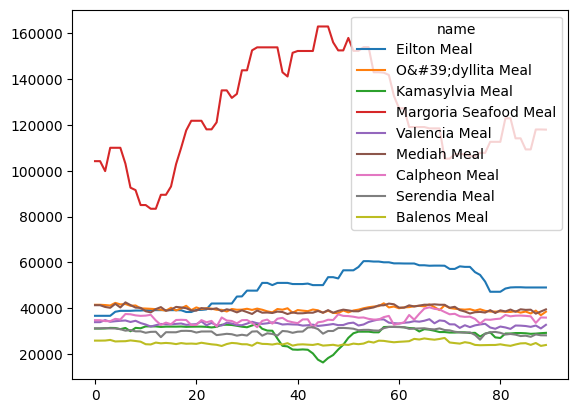

In [18]:
plt.figure()

normal_meals.plot()

In [19]:
normal_meals['Date'] = 89 - normal_meals.index # BDO keeps 90 days of selling history (mean price of the day)
normal_meals

name,Eilton Meal,O&#39;dyllita Meal,Kamasylvia Meal,Margoria Seafood Meal,Valencia Meal,Mediah Meal,Calpheon Meal,Serendia Meal,Balenos Meal,Date
0,36627,41445,31065,104174,33857,41261,34712,31139,25788,89
1,36627,41445,31065,104174,33857,41261,34712,31139,25788,88
2,36627,41321,31100,99831,34757,40491,34300,31280,25819,87
3,36627,41118,31343,110017,34022,40126,34305,31121,26095,86
4,38388,42270,31294,110017,34261,41859,35291,31101,25426,85
...,...,...,...,...,...,...,...,...,...,...
85,49000,38496,29000,109305,32166,39217,36599,27934,24663,4
86,49000,37648,28752,109305,31802,39301,36402,27460,23928,3
87,49000,38900,28855,118015,32381,37577,33533,28498,24750,2
88,48999,36888,29039,118015,31110,38498,35909,28124,23480,1


In [20]:
#today = datetime.datetime.now(tz=datetime.timezone.utc).date()
#unix_today = time.mktime(datetime.datetime.now(tz=datetime.timezone.utc).date().timetuple())

normal_meals['Date'] = normal_meals['Date'] * 86400 #convert into milliseconds
normal_meals['Date'] = time.mktime(datetime.datetime.now(tz=datetime.timezone.utc).date().timetuple()) - normal_meals['Date'] #convert into Unix timestamp
normal_meals['Date'] = pd.to_datetime(normal_meals['Date'], unit='s') #convert into readable date time

normal_meals

name,Eilton Meal,O&#39;dyllita Meal,Kamasylvia Meal,Margoria Seafood Meal,Valencia Meal,Mediah Meal,Calpheon Meal,Serendia Meal,Balenos Meal,Date
0,36627,41445,31065,104174,33857,41261,34712,31139,25788,2022-09-14 23:00:00
1,36627,41445,31065,104174,33857,41261,34712,31139,25788,2022-09-15 23:00:00
2,36627,41321,31100,99831,34757,40491,34300,31280,25819,2022-09-16 23:00:00
3,36627,41118,31343,110017,34022,40126,34305,31121,26095,2022-09-17 23:00:00
4,38388,42270,31294,110017,34261,41859,35291,31101,25426,2022-09-18 23:00:00
...,...,...,...,...,...,...,...,...,...,...
85,49000,38496,29000,109305,32166,39217,36599,27934,24663,2022-12-08 23:00:00
86,49000,37648,28752,109305,31802,39301,36402,27460,23928,2022-12-09 23:00:00
87,49000,38900,28855,118015,32381,37577,33533,28498,24750,2022-12-10 23:00:00
88,48999,36888,29039,118015,31110,38498,35909,28124,23480,2022-12-11 23:00:00


In [21]:
normal_meals['Day'] = normal_meals['Date'].dt.day_name() #Get the day of the week from Date

normal_meals

name,Eilton Meal,O&#39;dyllita Meal,Kamasylvia Meal,Margoria Seafood Meal,Valencia Meal,Mediah Meal,Calpheon Meal,Serendia Meal,Balenos Meal,Date,Day
0,36627,41445,31065,104174,33857,41261,34712,31139,25788,2022-09-14 23:00:00,Wednesday
1,36627,41445,31065,104174,33857,41261,34712,31139,25788,2022-09-15 23:00:00,Thursday
2,36627,41321,31100,99831,34757,40491,34300,31280,25819,2022-09-16 23:00:00,Friday
3,36627,41118,31343,110017,34022,40126,34305,31121,26095,2022-09-17 23:00:00,Saturday
4,38388,42270,31294,110017,34261,41859,35291,31101,25426,2022-09-18 23:00:00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
85,49000,38496,29000,109305,32166,39217,36599,27934,24663,2022-12-08 23:00:00,Thursday
86,49000,37648,28752,109305,31802,39301,36402,27460,23928,2022-12-09 23:00:00,Friday
87,49000,38900,28855,118015,32381,37577,33533,28498,24750,2022-12-10 23:00:00,Saturday
88,48999,36888,29039,118015,31110,38498,35909,28124,23480,2022-12-11 23:00:00,Sunday


In [22]:
#Calculate the mean value of each meal for each day of the week (round(2) to keep 2 decimals)
normal_meals_mean = normal_meals.groupby(['Day']).mean(numeric_only=True).round(2) 
normal_meals_mean

name,Eilton Meal,O&#39;dyllita Meal,Kamasylvia Meal,Margoria Seafood Meal,Valencia Meal,Mediah Meal,Calpheon Meal,Serendia Meal,Balenos Meal
Day,,,,,,,,,
Friday,48835.38,39497.46,28871.00,122926.77,32995.46,39557.46,35770.69,29968.00,24695.85
Monday,49648.46,39268.92,29059.54,127654.69,33117.00,39262.85,35028.54,29624.54,24630.38
Saturday,48887.00,39652.92,28942.85,124941.92,33059.46,39121.31,34904.15,29754.77,24661.38
Sunday,49501.46,39522.38,29202.00,127808.23,32616.92,39286.00,35487.38,29777.85,24435.92
Thursday,48357.00,39916.54,29315.85,123533.85,33192.69,39703.92,35291.00,29906.38,24787.08
Tuesday,49620.50,39714.50,29043.17,124515.50,33337.58,39585.00,35374.67,29292.58,24718.75
Wednesday,48735.92,39566.15,29286.08,122278.38,33390.77,39554.08,35196.54,29872.77,24908.54


In [23]:
print(normal_meals_mean.idxmin()) #idxmin returns the index of the min value (from each column)

name
Eilton Meal               Thursday
O&#39;dyllita Meal          Monday
Kamasylvia Meal             Friday
Margoria Seafood Meal    Wednesday
Valencia Meal               Sunday
Mediah Meal               Saturday
Calpheon Meal             Saturday
Serendia Meal              Tuesday
Balenos Meal                Sunday
dtype: object


In [24]:
boxing_normal_meals
#normal_meals_mean

,name,Qty
35367,Eilton Meal,21
35369,O&#39;dyllita Meal,15
35372,Kamasylvia Meal,33
35373,Margoria Seafood Meal,21
35377,Valencia Meal,18
35379,Mediah Meal,15
35381,Calpheon Meal,18
35383,Serendia Meal,21
35385,Balenos Meal,24


In [25]:
#Manually apply box multipliers to each meal
normal_meals_mean['Eilton Meal'] = normal_meals_mean['Eilton Meal'] * 21
normal_meals_mean['O&#39;dyllita Meal'] = normal_meals_mean['O&#39;dyllita Meal'] * 15
normal_meals_mean['Kamasylvia Meal'] = normal_meals_mean['Kamasylvia Meal'] * 33
normal_meals_mean['Margoria Seafood Meal'] = normal_meals_mean['Margoria Seafood Meal'] * 21
normal_meals_mean['Valencia Meal'] = normal_meals_mean['Valencia Meal'] * 18
normal_meals_mean['Mediah Meal'] = normal_meals_mean['Mediah Meal'] * 15
normal_meals_mean['Calpheon Meal'] = normal_meals_mean['Calpheon Meal'] * 18
normal_meals_mean['Serendia Meal'] = normal_meals_mean['Serendia Meal'] * 21
normal_meals_mean['Balenos Meal'] = normal_meals_mean['Balenos Meal'] * 24
normal_meals_mean

name,Eilton Meal,O&#39;dyllita Meal,Kamasylvia Meal,Margoria Seafood Meal,Valencia Meal,Mediah Meal,Calpheon Meal,Serendia Meal,Balenos Meal
Day,,,,,,,,,
Friday,1025542.98,592461.90,952743.00,2581462.17,593918.28,593361.90,643872.42,629328.00,592700.40
Monday,1042617.66,589033.80,958964.82,2680748.49,596106.00,588942.75,630513.72,622115.34,591129.12
Saturday,1026627.00,594793.80,955114.05,2623780.32,595070.28,586819.65,628274.70,624850.17,591873.12
Sunday,1039530.66,592835.70,963666.00,2683972.83,587104.56,589290.00,638772.84,625334.85,586462.08
Thursday,1015497.00,598748.10,967423.05,2594210.85,597468.42,595558.80,635238.00,628033.98,594889.92
Tuesday,1042030.50,595717.50,958424.61,2614825.50,600076.44,593775.00,636744.06,615144.18,593250.00
Wednesday,1023454.32,593492.25,966440.64,2567845.98,601033.86,593311.20,633537.72,627328.17,597804.96


In [26]:
#Min value of each mean price
normal_meals_mean.min()

name
Eilton Meal              1015497.00
O&#39;dyllita Meal        589033.80
Kamasylvia Meal           952743.00
Margoria Seafood Meal    2567845.98
Valencia Meal             587104.56
Mediah Meal               586819.65
Calpheon Meal             628274.70
Serendia Meal             615144.18
Balenos Meal              586462.08
dtype: float64

In [27]:
normal_meals_mean.idxmin()

name
Eilton Meal               Thursday
O&#39;dyllita Meal          Monday
Kamasylvia Meal             Friday
Margoria Seafood Meal    Wednesday
Valencia Meal               Sunday
Mediah Meal               Saturday
Calpheon Meal             Saturday
Serendia Meal              Tuesday
Balenos Meal                Sunday
dtype: object

In [28]:
# Create a df for normal meals only (min mean values)
df = pd.DataFrame()
df['Min Mean'] = normal_meals_mean.min()
df['Day'] = normal_meals_mean.idxmin()
df

,Min Mean,Day
name,,
Eilton Meal,1015497.00,Thursday
O&#39;dyllita Meal,589033.80,Monday
Kamasylvia Meal,952743.00,Friday
Margoria Seafood Meal,2567845.98,Wednesday
Valencia Meal,587104.56,Sunday
Mediah Meal,586819.65,Saturday
Calpheon Meal,628274.70,Saturday
Serendia Meal,615144.18,Tuesday
Balenos Meal,586462.08,Sunday


## Plotting Special meals

<AxesSubplot: xlabel='Day'>

<Figure size 640x480 with 0 Axes>

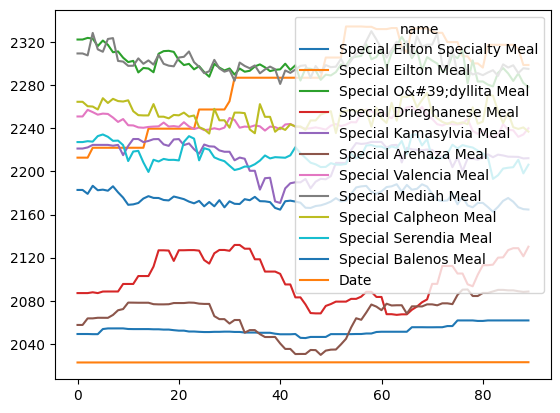

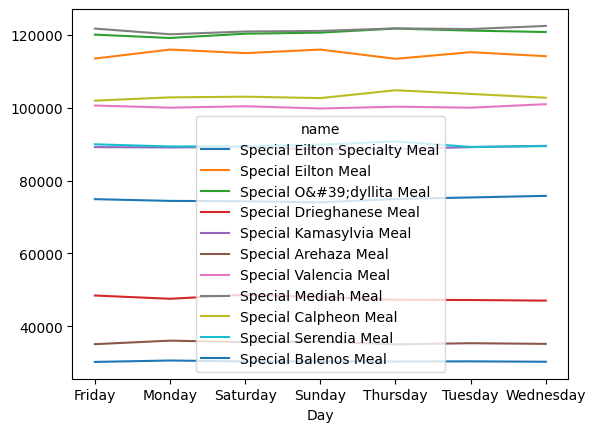

In [29]:
special_meals = special_meals.merge(resultMsg, left_on='id', right_on='ID')

special_meals = special_meals.drop(columns='id')
special_meals = special_meals.transpose()
special_meals.columns = special_meals.iloc[0] #Set meals' names as headers
special_meals = special_meals.iloc[1: , :] #Drop meals' names list
special_meals = special_meals.astype(int)

special_meals['Date'] = 89 - special_meals.index #History of 90 days (mean values)
special_meals['Date'] = special_meals['Date'] * 86400 #convert into milliseconds
special_meals['Date'] = time.mktime(datetime.datetime.now(tz=datetime.timezone.utc).date().timetuple()) - special_meals['Date'] #convert into Unix timestamp
special_meals['Date'] = pd.to_datetime(special_meals['Date'], unit='s') #convert into readable date time
special_meals['Day'] = special_meals['Date'].dt.day_name()
special_meals_mean = special_meals.groupby(['Day']).mean(numeric_only=True).round(2)

#raw plotting of results
plt.figure()
special_meals.plot()
special_meals_mean.plot()

In [30]:
boxing_special_meals

,name,Qty
35239,Special Eilton Specialty Meal,39
35366,Special Eilton Meal,7
35368,Special O&#39;dyllita Meal,5
35370,Special Drieghanese Meal,18
35371,Special Kamasylvia Meal,11
35375,Special Arehaza Meal,27
35376,Special Valencia Meal,6
35378,Special Mediah Meal,5
35380,Special Calpheon Meal,6
35382,Special Serendia Meal,7


In [31]:
#Manually apply multipliers for boxing
special_meals_mean['Special Eilton Specialty Meal'] = special_meals_mean['Special Eilton Specialty Meal'] * 39
special_meals_mean['Special Eilton Meal'] = special_meals_mean['Special Eilton Meal'] * 7
special_meals_mean['Special O&#39;dyllita Meal'] = special_meals_mean['Special O&#39;dyllita Meal'] * 7
special_meals_mean['Special Drieghanese Meal'] = special_meals_mean['Special Drieghanese Meal'] * 18
special_meals_mean['Special Kamasylvia Meal'] = special_meals_mean['Special Kamasylvia Meal'] * 11
special_meals_mean['Special Arehaza Meal'] = special_meals_mean['Special Arehaza Meal'] * 27
special_meals_mean['Special Valencia Meal'] = special_meals_mean['Special Mediah Meal'] * 6
special_meals_mean['Special Mediah Meal'] = special_meals_mean['Special Mediah Meal'] * 5
special_meals_mean['Special Calpheon Meal'] = special_meals_mean['Special Calpheon Meal'] * 6
special_meals_mean['Special Serendia Meal'] = special_meals_mean['Special Serendia Meal'] * 7
special_meals_mean['Special Balenos Meal'] = special_meals_mean['Special Balenos Meal'] * 8
#Print results
print(special_meals_mean.min())
print(special_meals_mean.idxmin())
special_meals_mean

name
Special Eilton Specialty Meal    1176573.06
Special Eilton Meal               794011.05
Special O&#39;dyllita Meal        834082.83
Special Drieghanese Meal          846174.42
Special Kamasylvia Meal           973481.41
Special Arehaza Meal              944885.79
Special Valencia Meal             721003.86
Special Mediah Meal               600836.55
Special Calpheon Meal             611686.62
Special Serendia Meal             624551.06
Special Balenos Meal              591995.04
dtype: float64
name
Special Eilton Specialty Meal       Friday
Special Eilton Meal               Thursday
Special O&#39;dyllita Meal          Monday
Special Drieghanese Meal         Wednesday
Special Kamasylvia Meal             Sunday
Special Arehaza Meal              Thursday
Special Valencia Meal               Monday
Special Mediah Meal                 Monday
Special Calpheon Meal               Friday
Special Serendia Meal              Tuesday
Special Balenos Meal                Sunday
dtype: object


name,Special Eilton Specialty Meal,Special Eilton Meal,Special O&#39;dyllita Meal,Special Drieghanese Meal,Special Kamasylvia Meal,Special Arehaza Meal,Special Valencia Meal,Special Mediah Meal,Special Calpheon Meal,Special Serendia Meal,Special Balenos Meal
Day,,,,,,,,,,,
Friday,1176573.06,794544.66,840499.17,871362.00,980917.41,946175.58,730398.48,608665.40,611686.62,629621.44,599008.64
Monday,1191758.88,811785.66,834082.83,855229.86,979891.00,972384.21,721003.86,600836.55,617026.14,625451.61,595235.68
Saturday,1181964.03,804918.17,842300.83,875121.30,981417.47,961401.42,725588.76,604657.30,618162.00,625893.66,594417.84
Sunday,1182611.82,811785.66,844335.17,863836.56,973481.41,964940.58,726528.48,605440.40,615849.72,628888.61,591995.04
Thursday,1180964.85,794011.05,852236.56,850462.56,975071.35,944885.79,730713.72,608928.10,628791.24,635097.61,599521.84
Tuesday,1182675.00,806787.31,848237.25,849078.00,980923.13,953280.09,729666.48,608055.40,622714.50,624551.06,602760.00
Wednesday,1178402.94,799070.44,845532.17,846174.42,984822.41,948472.74,734790.48,612325.40,616444.14,626189.34,606302.16


In [32]:
#Create a df for special meals only
df2 = pd.DataFrame()
df2['Min Mean'] = special_meals_mean.min()
df2['Day'] = special_meals_mean.idxmin()
df2

,Min Mean,Day
name,,
Special Eilton Specialty Meal,1176573.06,Friday
Special Eilton Meal,794011.05,Thursday
Special O&#39;dyllita Meal,834082.83,Monday
Special Drieghanese Meal,846174.42,Wednesday
Special Kamasylvia Meal,973481.41,Sunday
Special Arehaza Meal,944885.79,Thursday
Special Valencia Meal,721003.86,Monday
Special Mediah Meal,600836.55,Monday
Special Calpheon Meal,611686.62,Friday


In [33]:
#Concat both normal & special df
df3 = pd.DataFrame()
df3 = pd.concat([df, df2])
df3

,Min Mean,Day
name,,
Eilton Meal,1015497.00,Thursday
O&#39;dyllita Meal,589033.80,Monday
Kamasylvia Meal,952743.00,Friday
Margoria Seafood Meal,2567845.98,Wednesday
Valencia Meal,587104.56,Sunday
Mediah Meal,586819.65,Saturday
Calpheon Meal,628274.70,Saturday
Serendia Meal,615144.18,Tuesday
Balenos Meal,586462.08,Sunday


In [34]:
#Print out the best meal and day for boxing (lowest cost)
print('Meal with the best rentability for boxing:')
print(df3.loc[df3['Min Mean'].idxmin()])

Meal with the best rentability for boxing:
Min Mean    586462.08
Day            Sunday
Name: Balenos Meal, dtype: object
